# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

### Enunciar la hipótesis
H0= No hay diferencia de pérdida de peso significativa entre los dos grupos.
H1= Hay diferencia de pérdida de peso significativa entre los dos grupos.

In [4]:
from scipy.stats import ttest_ind

diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

t_value, p_value = ttest_ind(diet1, diet2, alternative='two-sided')

print(f'T-value: {t_value}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print(f'Se rechaza la hipótesis nula')
elif p_value >= 0.05:
    print(f'Se acepta la hipótesis nula')


T-value: -3.5383407969933938
p-value: 0.004083270191713912
Se rechaza la hipótesis nula


### Conclusión
Como nuestro pvalor es inferior al grado de confianza rechazamos la hipótesis nula y asumimos que hay diferencias significativas entre las dos dietas.

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

### Enunciar la hipótesis
H0 = No hay diferencia de rendimiento entre los tres tipos de fertilizantes.
H1 = Hay diferencia de rendimiento entre los tres tipos de fertilizantes.

In [5]:
from scipy.stats import f_oneway

fert_1 = [20, 21, 20, 19, 20]
fert_2 = [22, 21, 23, 22, 21]
fert_3 = [24, 23, 22, 23, 24]

f_value, p_value = f_oneway(fert_1, fert_2, fert_3)

print(f'f-value: {f_value}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print(f'Se rechaza la hipótesis nula')
elif p_value >= 0.05:
    print(f'Se acepta la hipótesis nula')



f-value: 20.31578947368421
p-value: 0.000140478247931904
Se rechaza la hipótesis nula


### Conclusión
Dado que el pvalor es inferior al nivel de significación, se rechaza la hipótesis nula y se asume que hay diferencias significativas entre las medias de los grupos.

### ¿Cuál es mejor?

In [6]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate([fert_1, fert_2, fert_3])
labels = ["F1"] * 5 + ["F2"] * 5 + ["F3"] * 5

# Tukey test
result = pairwise_tukeyhsd(data, labels, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


A partir de la columna reject sabemos que hay diferencias significativas entre las medias de todos los grupos. 
Fijándonos en la columna meandiff podemos saber que el fertilizante con mayor rendimiento es el 3.

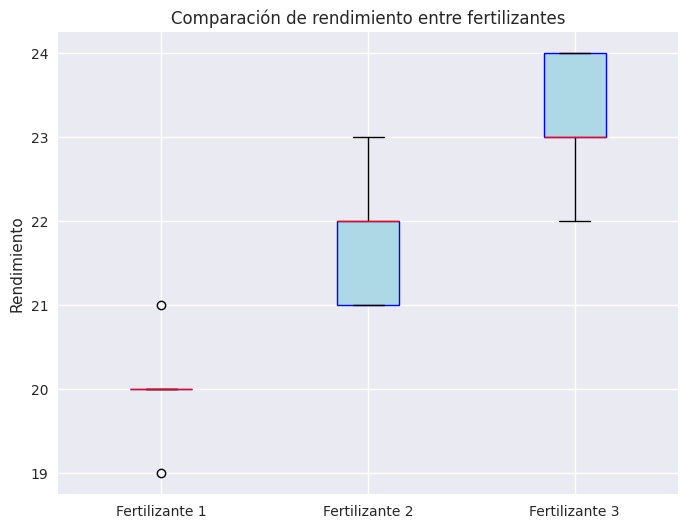

In [9]:
import matplotlib.pyplot as plt
# Crear gráfico de cajas
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([fert_1, fert_2, fert_3], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))

# Etiquetas y título
ax.set_xticklabels(['Fertilizante 1', 'Fertilizante 2', 'Fertilizante 3'])
ax.set_ylabel('Rendimiento')
ax.set_title('Comparación de rendimiento entre fertilizantes')

plt.show()

En el caso del fertilizante 1 salen valores outliers, pero no se trata de ningún error, se da debido a la poca cantidad de datos y que son valores uniformes, que situa los valores 19 y 21 fuera del rango intercuartílico.

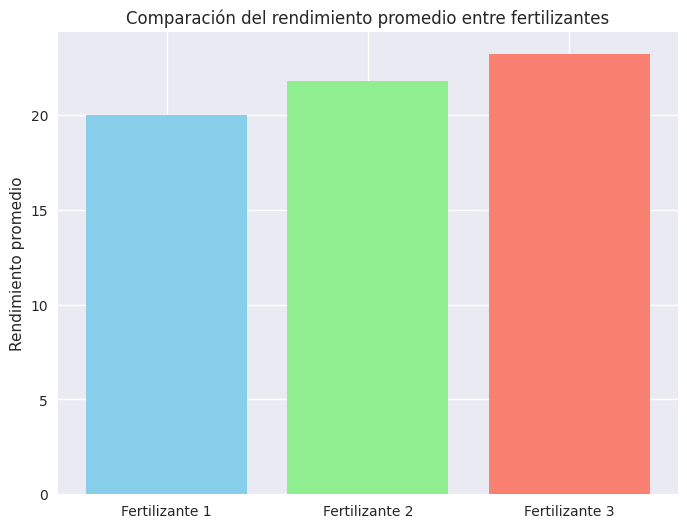

In [11]:
import numpy as np

medias = [np.mean(fert_1), np.mean(fert_2), np.mean(fert_3)]
errores = [np.std(fert_1, ddof=1), np.std(fert_2, ddof=1), np.std(fert_3, ddof=1)]

plt.figure(figsize=(8,6))
plt.bar(['Fertilizante 1', 'Fertilizante 2', 'Fertilizante 3'],
        medias, capsize=5, color=['skyblue','lightgreen','salmon'])
plt.ylabel('Rendimiento promedio')
plt.title('Comparación del rendimiento promedio entre fertilizantes')
plt.show()